# Optimisation: First example

This example shows you how to run a global optimisation with Pints.

First, we import pints:

In [1]:
import pints

Next, we need a model: any class that implements the [pints.ForwardModel interface](http://pints.readthedocs.io/en/latest/core_classes_and_methods.html#forward-model).

Usually, you'd write a class for this purpose (that wrapped around whatever simulation package you wanted to use to generate your time series data). But you could also use a pure-Python model.

In the example, we use a [logistic model](https://en.wikipedia.org/wiki/Logistic_function), provided by [Pints's toy model module](http://pints.readthedocs.io/en/latest/toy/index.html).

In [2]:
import pints.toy as toy
model = toy.LogisticModel()

This model has two parameters: A growth rate (which determines the steepness of the curve) and a carrying capacity (which determines the number the curve converges to).
For the example, we simply pick some nice values:

In [3]:
real_parameters = [0.015, 500]

Finally, we create a list of times (in a real experiment, these would be the times at which the time series was sampled)

In [4]:
import numpy as np
times = np.linspace(0, 1000, 100)

We now have everything we need to run a simulation and generate some toy data:

In [5]:
values = model.simulate(real_parameters, times)

We can use Matplotlib (or any other plotting package) to have a look at the generated data:

In [6]:
import matplotlib.pyplot as plt

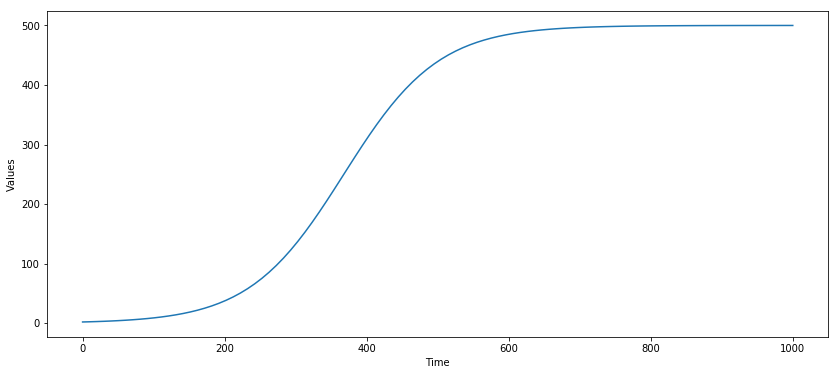

In [7]:
plt.figure(figsize=(14, 6))
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(times, values)
plt.show()

We now set up an optimisation, to see if we can recover our original parameters from this data.

First, we define a problem (in this case a [single-valued time series fitting problem](https://pints.readthedocs.io/en/latest/core_classes_and_methods.html#pints.SingleOutputProblem)):

In [8]:
problem = pints.SingleOutputProblem(model, times, values)

We then define an [error measure](http://pints.readthedocs.io/en/latest/error_measures.html) on this problem:

In [9]:
error = pints.SumOfSquaresError(problem)

A lot of real problems have physical constraints on the values the parameters can take, so in this example we add them in the form of [boundaries](http://pints.readthedocs.io/en/latest/boundaries.html):

In [10]:
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])

Finally, we define an initial position to start searching at

In [11]:
x0 = np.array([0.5, 500])

We now run an optimisation, using the [xNES](http://pints.readthedocs.io/en/latest/optimisers/xnes.html) method (although we could also have used a different global [optimiser](http://pints.readthedocs.io/en/latest/optimisers/index.html), like [CMA-ES](http://pints.readthedocs.io/en/latest/optimisers/cmaes.html) or [PSO](http://pints.readthedocs.io/en/latest/optimisers/pso.html)):

In [12]:
found_parameters, found_value = pints.optimise(
    error,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      3976639    0:00.0
1     12     3732403    0:00.0
2     18     2390792    0:00.0
3     24     2390792    0:00.0
20    126    92052.86   0:00.0
40    246    255.1182   0:00.1
60    366    0.0359     0:00.1
80    486    3.91e-05   0:00.1
100   606    2.7e-07    0:00.2
120   726    2.07e-11   0:00.2
140   846    3.6e-13    0:00.2
160   966    5.1e-17    0:00.2
180   1086   2.11e-20   0:00.3
200   1206   2.75e-22   0:00.3
220   1326   0          0:00.3
240   1446   0          0:00.3
260   1566   0          0:00.4
280   1686   0          0:00.4
300   1806   0          0:00.4
320   1926   0          0:00.4
325   1950   0          0:00.4
Halting: No significant change for 200 iterations.


We can now look at the quality of the fit by running a simulation with the obtained parameters and plotting it on top of the noisy data:

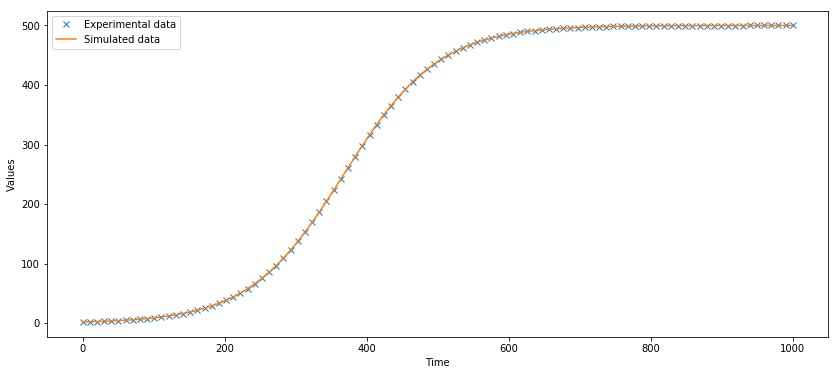

In [13]:
values2 = model.simulate(found_parameters, times)

plt.figure(figsize=(14, 6))
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(times, values, 'x', label='Experimental data')
plt.plot(times, values2, label='Simulated data')
plt.legend()
plt.show()

Because this was a toy model, we can also compare the parameters with the known true parameters:

In [14]:
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Found solution:          True parameters:
 1.49999999999999994e-02     1.49999999999999994e-02
 5.00000000000000000e+02     5.00000000000000000e+02


## Fitting to noisy data

We now repeat this exercise with noisy data:

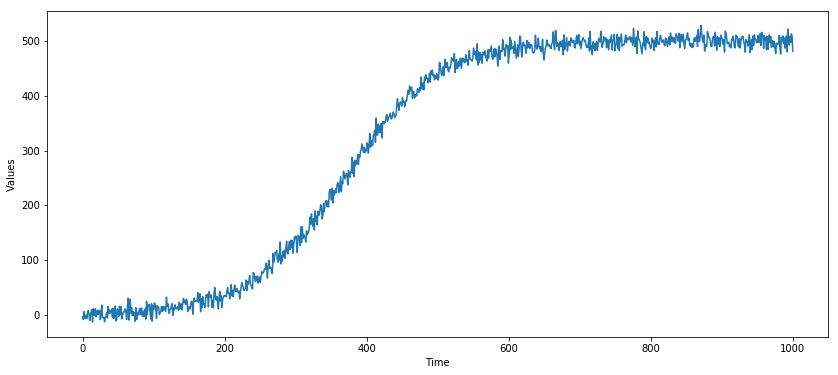

In [15]:
times = np.linspace(0, 1000, 1000)

values = model.simulate(real_parameters, times)
values += np.random.normal(size=values.shape) * 10

plt.figure(figsize=(14, 6))
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(times, values)
plt.show()

Again, we set up a problem, define an error measure, and run the optimisation:

In [16]:
problem = pints.SingleOutputProblem(model, times, values)
error = pints.SumOfSquaresError(problem)

found_parameters, found_value = pints.optimise(
    error,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      4.11e+07   0:00.0
1     12     4.09e+07   0:00.0
2     18     3.87e+07   0:00.0
3     24     3.27e+07   0:00.0
20    126    8668865    0:00.0
40    246    2521626    0:00.1
60    366    92283.66   0:00.1
80    486    92029.06   0:00.1
100   606    92028.8    0:00.1
120   726    92028.8    0:00.2
140   846    92028.8    0:00.2
160   966    92028.8    0:00.2
180   1086   92028.8    0:00.3
200   1206   92028.8    0:00.3
220   1326   92028.8    0:00.3
240   1446   92028.8    0:00.3
260   1566   92028.8    0:00.4
280   1686   92028.8    0:00.4
300   1806   92028.8    0:00.4
320   1926   92028.8    0:00.5
340   2046   92028.8    0:00.5
360   2166   92028.8    0:00.5
380   2286   92028.8    0:00.6
400   2406   92028.8    0:00.6
420   2526   92028.8    0:00.6
423   2538   92028.8    0:00.6
Halting: No significant change for 200 

And we can inspect the result by plotting a simulation:

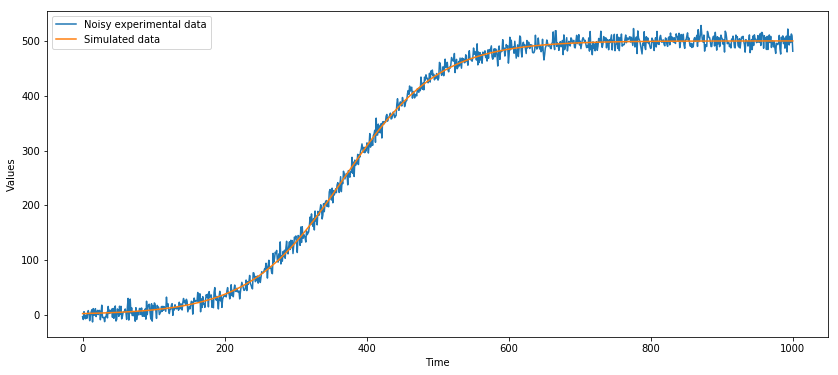

In [17]:
values2 = model.simulate(found_parameters, times)

plt.figure(figsize=(14, 6))
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(times, values, label='Noisy experimental data')
plt.plot(times, values2, label='Simulated data')
plt.legend()
plt.show()

Looks like a great fit!

Because it's still a toy problem, we can look at the parameter values as well:

In [18]:
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Found solution:          True parameters:
 1.49766027888600384e-02     1.49999999999999994e-02
 5.00292289223030309e+02     5.00000000000000000e+02


So it looks like we were close, but not _exactly_ at the right parameters.

Why didn't we find _exactly_ the right solution in the noisy case?

To investigate this, we start by looking at the error measure, evaluated at the true solution and at the obtained solution:

In [19]:
print('Error at obtained solution: ')
print(error(found_parameters))

print('Error at true solution: ')
print(error(real_parameters))

Error at obtained solution: 
92028.80051843653
Error at true solution: 
92217.07229800755


Another way to compare them is to plot the error function on a line drawn between these points:

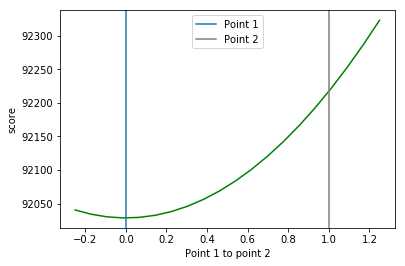

In [20]:
import pints.plot
fig, axes = pints.plot.function_between_points(error, point_1=found_parameters, point_2=real_parameters)
axes.set_ylabel('score')
plt.show()

So it looks like we found a solution that's slightly _better_ than the true solution - how can that be?

The answer comes from the noise we added to our data: it seems the optimiser is able to adjust the model parameters _so that the model reproduces some aspects of the noise signal_.
In other words, we are slightly [overfitting](https://en.wikipedia.org/wiki/Overfitting).